In [1]:
import pandas as pd

In [2]:
arquivos = ["./canc2023.parquet", "./canc2024.parquet"]
df = pd.concat([pd.read_parquet(arquivo) for arquivo in arquivos], ignore_index=True)


In [3]:
df

,TP_NOT,DT_NOTIFIC,SEM_NOT,NU_ANO,ID_AGRAVO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,DT_DIAG,...,OUT_EXP_DE,DT_DIGITA,DT_TRANSUS,DT_TRANSDM,DT_TRANSSM,DT_TRNASRM,DT_TRANSRS,DT_TRANSSE,NU_LOTE_V,NU_LOTE_H
0,2,20230102,202301,2023,C80,33,330455,,2273454,20230102,...,,20240112,,,,,,,0000000,
1,2,20230103,202301,2023,C80,23,230440,1519,3919838,20150525,...,EM INVESTIGACAO,20230103,20230104,,20230127,,,,0000000,
2,2,20230103,202301,2023,C80,52,520870,1779,6048196,20220602,...,ASGROTOXICOS,20230329,,,,,,,0000000,
3,2,20230104,202301,2023,C80,33,330414,,6423329,20230104,...,,20230123,,,,,,,0000000,
4,2,20230104,202301,2023,C80,33,330414,,6423329,20230104,...,,20230123,,,,,,,0000000,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2236,2,20240904,202436,2024,C80,42,420190,1478,2377128,20240821,...,,20240905,,,,,,,0000000,
2237,2,20240906,202436,2024,C80,31,314850,1465,6438245,20171110,...,,20240910,,,,,,,0000000,
2238,2,20240909,202437,2024,C80,31,314790,1455,2759292,20190330,...,,20240909,,,,,,,0000000,
2239,2,20240909,202437,2024,C80,31,314850,1465,6438245,20231004,...,RADIACAO SOLAR,20240910,,,,,,,0000000,


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2241 entries, 0 to 2240
Data columns (total 66 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   TP_NOT      2241 non-null   object
 1   DT_NOTIFIC  2241 non-null   object
 2   SEM_NOT     2241 non-null   object
 3   NU_ANO      2241 non-null   object
 4   ID_AGRAVO   2241 non-null   object
 5   SG_UF_NOT   2241 non-null   object
 6   ID_MUNICIP  2241 non-null   object
 7   ID_REGIONA  2241 non-null   object
 8   ID_UNIDADE  2241 non-null   object
 9   DT_DIAG     2241 non-null   object
 10  SEM_DIAG    2241 non-null   object
 11  ANO_NASC    2241 non-null   object
 12  NU_IDADE_N  2241 non-null   object
 13  CS_SEXO     2241 non-null   object
 14  CS_GESTANT  2241 non-null   object
 15  CS_RACA     2241 non-null   object
 16  CS_ESCOL_N  2241 non-null   object
 17  SG_UF       2241 non-null   object
 18  ID_MN_RESI  2241 non-null   object
 19  ID_RG_RESI  2241 non-null   object
 20  ID_PAIS 

In [5]:
# Remover a coluna NU_LOTE_V
df = df.drop(columns=['NU_LOTE_V'])

# Verificar novamente as informações do DataFrame
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2241 entries, 0 to 2240
Data columns (total 65 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   TP_NOT      2241 non-null   object
 1   DT_NOTIFIC  2241 non-null   object
 2   SEM_NOT     2241 non-null   object
 3   NU_ANO      2241 non-null   object
 4   ID_AGRAVO   2241 non-null   object
 5   SG_UF_NOT   2241 non-null   object
 6   ID_MUNICIP  2241 non-null   object
 7   ID_REGIONA  2241 non-null   object
 8   ID_UNIDADE  2241 non-null   object
 9   DT_DIAG     2241 non-null   object
 10  SEM_DIAG    2241 non-null   object
 11  ANO_NASC    2241 non-null   object
 12  NU_IDADE_N  2241 non-null   object
 13  CS_SEXO     2241 non-null   object
 14  CS_GESTANT  2241 non-null   object
 15  CS_RACA     2241 non-null   object
 16  CS_ESCOL_N  2241 non-null   object
 17  SG_UF       2241 non-null   object
 18  ID_MN_RESI  2241 non-null   object
 19  ID_RG_RESI  2241 non-null   object
 20  ID_PAIS 

In [6]:
# Variáveis que você deseja usar no modelo
selected_columns = [
    "ID_OCUPA_N", "NUTEMPO", "TPTEMPO", "NUTEMPORIS", "TPTEMPORIS",
    "ASBESTO", "CADMIO", "SILICA", "CROMO", "AMINA", "NIQUEL", "BENZENO",
    "IONIZANTES", "ALCATRAO", "NAO_IONIZA", "HIDROCARBO", "HORMONIO",
    "OLEOS", "NEOPLASICO", "BERILIO", "OUTRO_EXP", "OUT_EXP_DE", 
    "FUMA", "TEMPO_FUMA", "TP_TEMP_FU", "CAT"
]

# Selecionando essas colunas no DataFrame
X_selected = df[selected_columns]


In [7]:
# Definindo o alvo (target)
target_variable = 'EVOLUCAO'  # Substitua pelo nome real da variável alvo

# Separando as variáveis independentes e dependentes
X = X_selected  # Variáveis independentes (features)
y = df[target_variable]  # Variável dependente (target)


In [8]:
# Separando variáveis numéricas e categóricas
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

print("Variáveis numéricas:", numerical_cols)
print("Variáveis categóricas:", categorical_cols)


Variáveis numéricas: Index([], dtype='object')
Variáveis categóricas: Index(['ID_OCUPA_N', 'NUTEMPO', 'TPTEMPO', 'NUTEMPORIS', 'TPTEMPORIS',
       'ASBESTO', 'CADMIO', 'SILICA', 'CROMO', 'AMINA', 'NIQUEL', 'BENZENO',
       'IONIZANTES', 'ALCATRAO', 'NAO_IONIZA', 'HIDROCARBO', 'HORMONIO',
       'OLEOS', 'NEOPLASICO', 'BERILIO', 'OUTRO_EXP', 'OUT_EXP_DE', 'FUMA',
       'TEMPO_FUMA', 'TP_TEMP_FU', 'CAT'],
      dtype='object')


In [9]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier  # Importando o RandomForestClassifier

# Definindo as variáveis numéricas e categóricas
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Pipeline para processar os dados
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),  # Deixar as variáveis numéricas como estão
        ('cat', OneHotEncoder(), categorical_cols)  # OneHotEncoding nas variáveis categóricas
    ])

# Criando o pipeline final com o modelo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))  # ou RandomForestRegressor
])

# Ajustando o modelo
pipeline.fit(X, y)

# Obtendo a importância das variáveis
importances = pipeline.named_steps['classifier'].feature_importances_

# Exibindo a importância das variáveis
feature_importance_df  = pd.DataFrame({
    'Feature': numerical_cols.tolist() + list(pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_cols)),
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df )


               Feature  Importance
114  ID_OCUPA_N_621005    0.021966
108  ID_OCUPA_N_612005    0.021908
923              CAT_2    0.021837
911       TP_TEMP_FU_     0.021697
925              CAT_9    0.015470
..                 ...         ...
93   ID_OCUPA_N_517215    0.000000
31   ID_OCUPA_N_313120    0.000000
30   ID_OCUPA_N_313105    0.000000
33   ID_OCUPA_N_314110    0.000000
208  ID_OCUPA_N_782815    0.000000

[926 rows x 2 columns]


In [10]:
# Ordenando pela importância (do maior para o menor)
feature_importance_df = feature_importance_df .sort_values(by='Importance', ascending=False)


In [11]:
# Exibe todas as variáveis com suas importâncias
pd.set_option('display.max_rows', None)  # Mostra todas as linhas no notebook
print(feature_importance_df)


                                       Feature    Importance
114                          ID_OCUPA_N_621005  2.196597e-02
108                          ID_OCUPA_N_612005  2.190845e-02
923                                      CAT_2  2.183665e-02
911                               TP_TEMP_FU_   2.169723e-02
925                                      CAT_9  1.546985e-02
420                               TPTEMPORIS_   1.524200e-02
339                              NUTEMPORIS_    1.517324e-02
924                                      CAT_3  1.507007e-02
912                               TP_TEMP_FU_0  1.492826e-02
904                                     FUMA_2  1.370362e-02
902                                     FUMA_   1.316492e-02
462                               NAO_IONIZA_1  1.192941e-02
148                          ID_OCUPA_N_715210  1.171969e-02
903                                     FUMA_1  1.131578e-02
905                                     FUMA_3  1.074540e-02
621  OUT_EXP_DE_EXPOSICA

In [12]:
# Filtra as variáveis com importância 0
zero_importance_df = feature_importance_df[feature_importance_df['Importance'] == 0]

print(f"Total de variáveis com importância zero: {len(zero_importance_df)}")
print(zero_importance_df)

Total de variáveis com importância zero: 13
                                       Feature  Importance
326                                 NUTEMPO_79         0.0
840  OUT_EXP_DE_RESIDUOS DE QUEIMA DE DIESEL           0.0
178                          ID_OCUPA_N_731175         0.0
74                           ID_OCUPA_N_514205         0.0
198                          ID_OCUPA_N_773355         0.0
22                           ID_OCUPA_N_261125         0.0
35                           ID_OCUPA_N_318810         0.0
36                           ID_OCUPA_N_321105         0.0
93                           ID_OCUPA_N_517215         0.0
31                           ID_OCUPA_N_313120         0.0
30                           ID_OCUPA_N_313105         0.0
33                           ID_OCUPA_N_314110         0.0
208                          ID_OCUPA_N_782815         0.0


C:\Users\Samuel\AppData\Local\Temp\ipykernel_9124\307380170.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_20, palette='viridis')


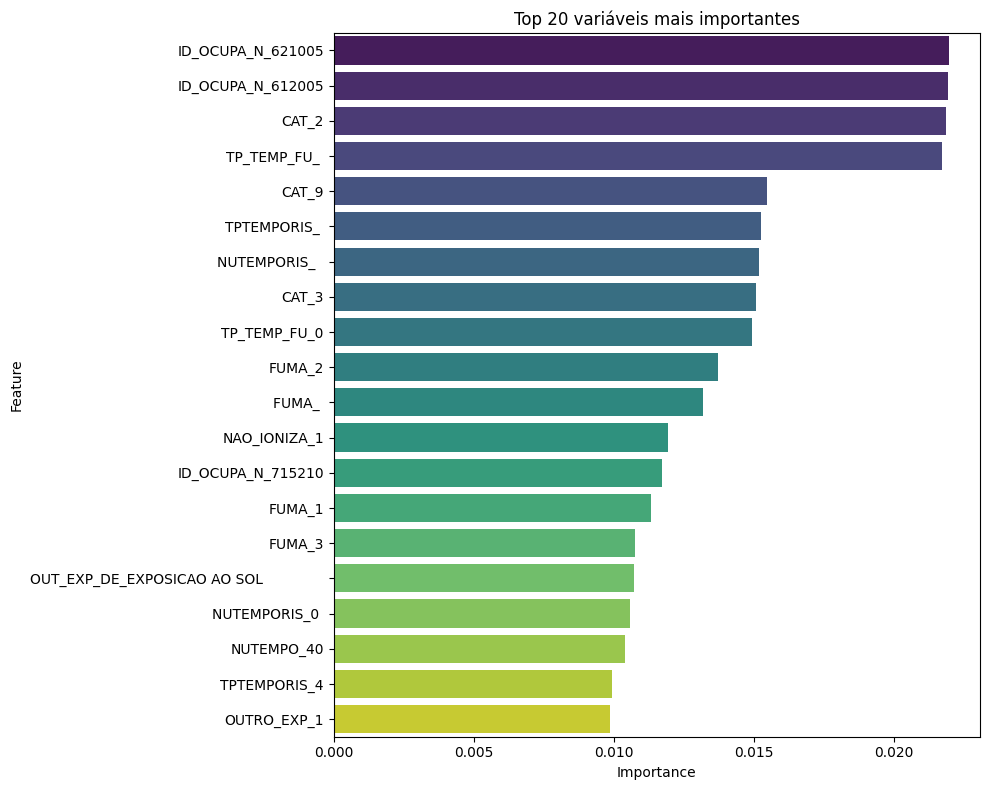

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

top_20 = feature_importance_df.head(20)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=top_20, palette='viridis')
plt.title('Top 20 variáveis mais importantes')
plt.tight_layout()
plt.show()


In [14]:
df.columns.tolist()


['TP_NOT',
 'DT_NOTIFIC',
 'SEM_NOT',
 'NU_ANO',
 'ID_AGRAVO',
 'SG_UF_NOT',
 'ID_MUNICIP',
 'ID_REGIONA',
 'ID_UNIDADE',
 'DT_DIAG',
 'SEM_DIAG',
 'ANO_NASC',
 'NU_IDADE_N',
 'CS_SEXO',
 'CS_GESTANT',
 'CS_RACA',
 'CS_ESCOL_N',
 'SG_UF',
 'ID_MN_RESI',
 'ID_RG_RESI',
 'ID_PAIS',
 'ID_OCUPA_N',
 'SIT_TRAB',
 'NUTEMPO',
 'TPTEMPO',
 'CNAE',
 'UF_EMP',
 'MUN_EMP',
 'TERCEIRIZA',
 'NUTEMPORIS',
 'TPTEMPORIS',
 'REGIME',
 'DIAG_ESP',
 'ASBESTO',
 'SILICA',
 'AMINA',
 'BENZENO',
 'ALCATRAO',
 'HIDROCARBO',
 'OLEOS',
 'BERILIO',
 'CADMIO',
 'CROMO',
 'NIQUEL',
 'IONIZANTES',
 'NAO_IONIZA',
 'HORMONIO',
 'NEOPLASICO',
 'OUTRO_EXP',
 'FUMA',
 'TEMPO_FUMA',
 'TP_TEMP_FU',
 'TRAB_DOE',
 'EVOLUCAO',
 'DT_OBITO',
 'CAT',
 'OUT_EXP_DE',
 'DT_DIGITA',
 'DT_TRANSUS',
 'DT_TRANSDM',
 'DT_TRANSSM',
 'DT_TRNASRM',
 'DT_TRANSRS',
 'DT_TRANSSE',
 'NU_LOTE_H']

In [15]:
X.columns.tolist()


['ID_OCUPA_N',
 'NUTEMPO',
 'TPTEMPO',
 'NUTEMPORIS',
 'TPTEMPORIS',
 'ASBESTO',
 'CADMIO',
 'SILICA',
 'CROMO',
 'AMINA',
 'NIQUEL',
 'BENZENO',
 'IONIZANTES',
 'ALCATRAO',
 'NAO_IONIZA',
 'HIDROCARBO',
 'HORMONIO',
 'OLEOS',
 'NEOPLASICO',
 'BERILIO',
 'OUTRO_EXP',
 'OUT_EXP_DE',
 'FUMA',
 'TEMPO_FUMA',
 'TP_TEMP_FU',
 'CAT']

c:\Users\Samuel\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Samuel\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Samuel\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Samuel\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Samuel\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_s

Logistic Regression: 0.5466
Support Vector Machine: 0.5462
Random Forest: 0.5263
Neural Network: 0.5204


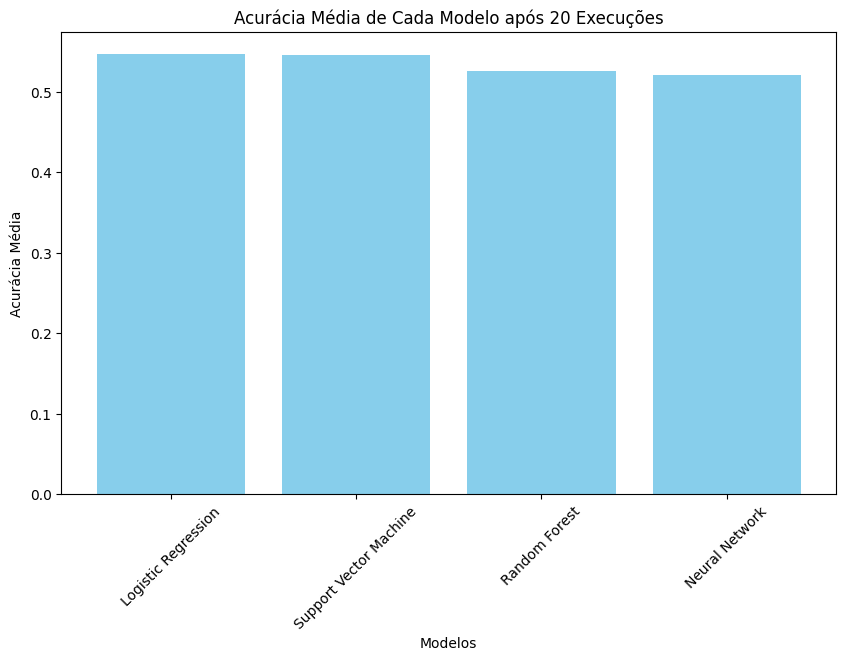

In [17]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Separando as variáveis preditoras (X) e o alvo (y)
X = df.drop('SIT_TRAB', axis=1)  # Substitua por seu alvo real
y = df['SIT_TRAB']  # Substitua pelo seu alvo real

# Detecta colunas numéricas e categóricas
colunas_categoricas = X.select_dtypes(include=['object']).columns
colunas_numericas = X.select_dtypes(exclude=['object']).columns

# Pré-processamento
preprocessador = ColumnTransformer(transformers=[
    ("num", Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="mean")),
        ("scaler", StandardScaler())
    ]), colunas_numericas),

    ("cat", Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown='ignore'))
    ]), colunas_categoricas)
])

# Definindo os modelos a serem testados
modelos = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Neural Network": MLPClassifier(max_iter=1000)
}

# Inicializando um dicionário para armazenar as médias de acurácia de cada modelo
resultados = {nome: [] for nome in modelos.keys()}

# Repetir 20 vezes para melhorar a robustez da avaliação
for i in range(20):
    for nome, modelo in modelos.items():
        pipeline = Pipeline(steps=[
            ('preprocessamento', preprocessador),
            ('modelo', modelo)
        ])
        
        # Realizando cross-validation e armazenando a acurácia média de cada execução
        scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
        resultados[nome].append(scores.mean())

# Calculando a acurácia média das 20 execuções para cada modelo
media_resultados = {modelo: sum(scores) / len(scores) for modelo, scores in resultados.items()}

# Mostrando as médias
for modelo, score in media_resultados.items():
    print(f"{modelo}: {score:.4f}")

# Criando o gráfico
plt.figure(figsize=(10, 6))
plt.bar(media_resultados.keys(), media_resultados.values(), color='skyblue')
plt.xlabel('Modelos')
plt.ylabel('Acurácia Média')
plt.title('Acurácia Média de Cada Modelo após 20 Execuções')
plt.xticks(rotation=45)
plt.show()
